<a href="https://colab.research.google.com/github/UshnishG/Prism/blob/main/Gan_Prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`CTGAN For Tabular Generation Model Data`**

In [4]:
!pip install --upgrade sdv



  Using cached sdv-1.17.2-py3-none-any.whl.metadata (13 kB)
  Using cached copulas-0.12.0-py3-none-any.whl.metadata (9.1 kB)
  Using cached ctgan-0.10.2-py3-none-any.whl.metadata (10 kB)
  Using cached deepecho-0.6.1-py3-none-any.whl.metadata (10 kB)
  Using cached rdt-1.13.1-py3-none-any.whl.metadata (10 kB)
  Using cached sdmetrics-0.17.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached Faker-33.0.0-py3-none-any.whl.metadata (15 kB)
Using cached sdv-1.17.2-py3-none-any.whl (154 kB)
Using cached copulas-0.12.0-py3-none-any.whl (52 kB)
Using cached ctgan-0.10.2-py3-none-any.whl (23 kB)
Using cached deepecho-0.6.1-py3-none-any.whl (27 kB)
Using cached rdt-1.13.1-py3-none-any.whl (66 kB)
Using cached sdmetrics-0.17.0-py3-none-any.whl (174 kB)
Using cached Faker-33.0.0-py3-none-any.whl (1.9 MB)
  Attempting uninstall: Faker
    Found existing installation: Faker 14.2.1
    Uninstalling Faker-14.2.1:
      Successfully uninstalled Faker-14.2.1
  Attempting uninstall: rdt
    Found existin

`CREATE A DATASET SAMPLE`

In [1]:
import pandas as pd

# Sample training data for a "network elements template"
data = {
    "Device Name": ["Router-01", "Switch-01", "Firewall-01"],
    "Device Type": ["Router", "Switch", "Firewall"],
    "Vendor": ["Cisco", "Juniper", "Palo Alto"],
    "Model Number": ["XR1000", "EX4200", "PA-850"],
    "Serial Number": ["12345ABC", "67890DEF", "11223GHI"],
    "Operating System Version": ["v12.1.3", "v14.2.1", "v8.5.6"],
    "IP Address": ["192.168.1.1", "192.168.1.2", "192.168.1.3"],
    "MAC Address": ["00:1B:44:11:3A:B7", "00:1B:44:11:3A:B8", "00:1B:44:11:3A:B9"],
    "Location": ["Data Center A, Rack 12", "Data Center B, Rack 5", "Data Center C, Rack 8"]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)


   Device Name Device Type     Vendor Model Number Serial Number  \
0    Router-01      Router      Cisco       XR1000      12345ABC   
1    Switch-01      Switch    Juniper       EX4200      67890DEF   
2  Firewall-01    Firewall  Palo Alto       PA-850      11223GHI   

  Operating System Version   IP Address        MAC Address  \
0                  v12.1.3  192.168.1.1  00:1B:44:11:3A:B7   
1                  v14.2.1  192.168.1.2  00:1B:44:11:3A:B8   
2                   v8.5.6  192.168.1.3  00:1B:44:11:3A:B9   

                 Location  
0  Data Center A, Rack 12  
1   Data Center B, Rack 5  
2   Data Center C, Rack 8  


`Create a Metadata for CTGANSynthesizer`

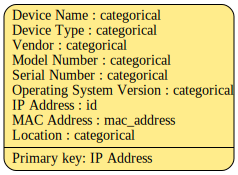

In [9]:
from sdv.metadata.single_table import SingleTableMetadata

# Initialize metadata
metadata = SingleTableMetadata()



# Add fields to metadata
metadata.detect_from_dataframe(data=df)
metadata.update_column(
    column_name="IP Address",
    sdtype="id"
)


# Display the detected metadata
metadata.visualize()


`TRAIN DATASET using CTGAN`

In [11]:
from sdv.single_table import CTGANSynthesizer

# Initialize CTGAN Synthesizer with metadata
synthesizer = CTGANSynthesizer(metadata=metadata)


# Fit the synthesizer on the dataset
synthesizer.fit(df)

# Generate synthetic data
synthetic_data = synthesizer.sample(100)
# Save synthetic data as a CSV file
synthetic_data.to_csv("synthetic_network_elements.csv", index=False)

print("Synthetic data saved as 'synthetic_network_elements.csv'")


# Display synthetic data
print(synthetic_data)


/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


Synthetic data saved as 'synthetic_network_elements.csv'
    Device Name Device Type     Vendor Model Number Serial Number  \
0   Firewall-01    Firewall    Juniper       PA-850      11223GHI   
1     Router-01      Router    Juniper       EX4200      67890DEF   
2   Firewall-01      Switch      Cisco       EX4200      11223GHI   
3     Switch-01    Firewall      Cisco       PA-850      12345ABC   
4     Switch-01      Switch    Juniper       EX4200      67890DEF   
..          ...         ...        ...          ...           ...   
95  Firewall-01    Firewall    Juniper       PA-850      67890DEF   
96    Switch-01      Router    Juniper       EX4200      67890DEF   
97    Switch-01    Firewall    Juniper       EX4200      11223GHI   
98    Router-01      Switch  Palo Alto       PA-850      67890DEF   
99    Router-01      Router      Cisco       EX4200      67890DEF   

   Operating System Version     IP Address        MAC Address  \
0                   v14.2.1  sdv-id-GveVZN  90:1f